In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from google.colab import files

# Upload the dataset
print("Please upload your dataset file:")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Split the dataset into train and test sets (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

print(f"\nTraining set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

# Determine the number of unique words in the text column of train set
# Convert all text to lowercase and split into words
all_words = []
for text in train_df['text']:
    if pd.notna(text):  # Check if text is not NaN
        words = str(text).lower().split()
        all_words.extend(words)

unique_words = len(set(all_words))
print(f"\n=== ANSWER 1 ===")
print(f"Number of unique words in the text column of train set: {unique_words}")

print(f"unique_words : \n {all_words}")
print(f"unique_words : \n {set(all_words)}")



# Define feature columns
numerical_features = ['Land Area (Km²)']
ordinal_features = ['Density_Level', 'Population_Group']
nominal_features = ['Age of User', 'Time of Tweet', 'Continent']
text_feature = 'text'

# Separate features and create preprocessing pipelines
X_train = train_df.drop(columns=[text_feature])
X_test = test_df.drop(columns=[text_feature])

# Create the ColumnTransformer for non-text features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                           ['Low', 'Medium', 'High']]),
         ordinal_features),
        ('nom', OneHotEncoder(sparse_output=False, drop='first'), nominal_features)
    ],
    remainder='drop'
)

# Fit and transform non-text features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Create and fit TfidfVectorizer for text features
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2),
    token_pattern=r'(?u)\b\w\w+\b|[@#]\w+',
    strip_accents='unicode'
)

# Fit and transform text features
X_train_text = tfidf.fit_transform(train_df[text_feature].fillna(''))
X_test_text = tfidf.transform(test_df[text_feature].fillna(''))

# Convert sparse matrix to dense array
X_train_text_dense = X_train_text.toarray()
X_test_text_dense = X_test_text.toarray()

# Combine all features
X_train_final = np.hstack([X_train_transformed, X_train_text_dense])
X_test_final = np.hstack([X_test_transformed, X_test_text_dense])

print(f"\nFinal training set shape: {X_train_final.shape}")
print(f"Final test set shape: {X_test_final.shape}")

# Calculate the sum of all values in the first five rows of transformed test feature matrix
sum_first_five_rows = np.sum(X_test_final[:5])
sum_first_five_rows_rounded = round(sum_first_five_rows, 2)

print(f"\n=== ANSWER 2 ===")
print(f"Sum of all values in first five rows of transformed test feature matrix: {sum_first_five_rows_rounded}")

# Display additional information
print(f"\n=== ADDITIONAL INFORMATION ===")
print(f"Shape of non-text features (train): {X_train_transformed.shape}")
print(f"Shape of text features (train): {X_train_text_dense.shape}")
print(f"Number of TF-IDF features: {X_train_text_dense.shape[1]}")
print(f"\nFirst 5 rows sum breakdown:")
for i in range(5):
    print(f"  Row {i+1}: {np.sum(X_test_final[i]):.2f}")

Please upload your dataset file:


Saving processed_data.csv to processed_data (4).csv
Dataset loaded successfully!
Dataset shape: (16363, 8)

First few rows:
                                                text sentiment Time of Tweet  \
0      Sooo SAD I will miss you here in San Diego!!!  negative          noon   
1                          my boss is bullying me...  negative         night   
2                     what interview! leave me alone  negative       morning   
3   Sons of ****, why couldn`t they put them on t...  negative          noon   
4  2am feedings for the baby are fun when he is a...  positive       morning   

  Age of User  Land Area (Km²) Continent Density_Level Population_Group  
0       21-30          27400.0        EU        Medium           Medium  
1       31-45        2381740.0        AF           Low           Medium  
2       46-60            470.0        EU        Medium              Low  
3       60-70        1246700.0        AF           Low           Medium  
4        0-20        2736

Target variable distribution:
Train: sentiment
positive    6841
negative    6249
Name: count, dtype: int64
Test: sentiment
positive    1741
negative    1532
Name: count, dtype: int64

Q3: MULTINOMIAL NAIVE BAYES MODEL
Training set shape (without Land Area): (13090, 5015)
Test set shape (without Land Area): (3273, 5015)

Checking for negative values...
Min value in training set: 0.0
Max value in training set: 2.0
Min value after adjustment: 0.0
Max value after adjustment: 2.0

MultinomialNB model trained successfully!

=== ANSWER Q3 ===
Log Loss on test dataset (excluding Land Area): 0.368739
Accuracy: 0.8549

Q5: RANDOM FOREST CLASSIFIER - ERROR ANALYSIS
RandomForestClassifier model trained successfully!
Training set shape (with all features): (13090, 5016)
Test set shape (with all features): (3273, 5016)

Accuracy on test set: 0.8622

Confusion Matrix:
[[1348  184]
 [ 267 1474]]

Class labels: ['negative' 'positive']

Confusion Matrix (labeled):
          negative  positive
negative  

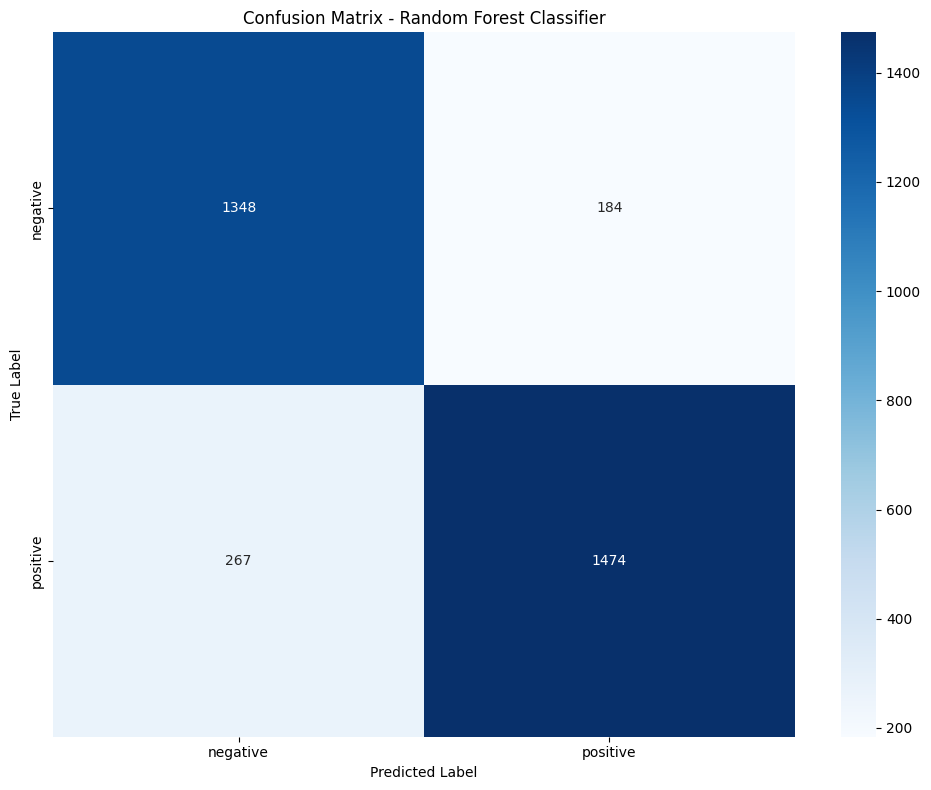


Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.86      1532
    positive       0.89      0.85      0.87      1741

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273


Top 20 Most Important Features:
  Feature 2706: 0.035393
  Feature 4242: 0.026665
  Feature 1867: 0.023225
  Feature 0: 0.017987
  Feature 1965: 0.014598
  Feature 3766: 0.014478
  Feature 2052: 0.014335
  Feature 2870: 0.013792
  Feature 4004: 0.013224
  Feature 4235: 0.012661
  Feature 319: 0.012064
  Feature 2189: 0.011516
  Feature 3059: 0.011336
  Feature 2072: 0.009617
  Feature 1701: 0.009017
  Feature 1011: 0.007942
  Feature 342: 0.007506
  Feature 411: 0.007181
  Feature 218: 0.007163
  Feature 4128: 0.006567


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already run the preprocessing code from the previous question
# and have X_train_final, X_test_final, train_df, and test_df available

# Extract target variable
y_train = train_df['label'] if 'label' in train_df.columns else train_df['sentiment']
y_test = test_df['label'] if 'label' in test_df.columns else test_df['sentiment']

print("Target variable distribution:")
print(f"Train: {y_train.value_counts()}")
print(f"Test: {y_test.value_counts()}")

# ============================================================
# Q3: MultinomialNB (excluding Land Area feature)
# ============================================================

print("\n" + "="*60)
print("Q3: MULTINOMIAL NAIVE BAYES MODEL")
print("="*60)

# Find the index of Land Area (Km²) column in the transformed features
# The first column after ColumnTransformer is the scaled Land Area
# So we need to exclude index 0

# Create features without Land Area (exclude first column which is Land Area after StandardScaler)
X_train_no_land = X_train_final[:, 1:]  # Exclude first column
X_test_no_land = X_test_final[:, 1:]    # Exclude first column

print(f"Training set shape (without Land Area): {X_train_no_land.shape}")
print(f"Test set shape (without Land Area): {X_test_no_land.shape}")

# MultinomialNB requires non-negative features
# Check if there are any negative values
print(f"\nChecking for negative values...")
print(f"Min value in training set: {X_train_no_land.min()}")
print(f"Max value in training set: {X_train_no_land.max()}")

# If there are still negative values (from OneHotEncoder or other features),
# we need to handle them
if X_train_no_land.min() < 0:
    print("\nWarning: Negative values detected. Applying transformation...")
    # Shift all values to be non-negative
    min_val = X_train_no_land.min()
    X_train_no_land_adjusted = X_train_no_land - min_val
    X_test_no_land_adjusted = X_test_no_land - min_val
else:
    X_train_no_land_adjusted = X_train_no_land
    X_test_no_land_adjusted = X_test_no_land

print(f"Min value after adjustment: {X_train_no_land_adjusted.min()}")
print(f"Max value after adjustment: {X_train_no_land_adjusted.max()}")

# Train MultinomialNB model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_no_land_adjusted, y_train)

print(f"\nMultinomialNB model trained successfully!")

# Make predictions and get probabilities
y_pred_mnb = mnb_model.predict(X_test_no_land_adjusted)
y_pred_proba_mnb = mnb_model.predict_proba(X_test_no_land_adjusted)

# Calculate log_loss
logloss_mnb = log_loss(y_test, y_pred_proba_mnb)

print(f"\n=== ANSWER Q3 ===")
print(f"Log Loss on test dataset (excluding Land Area): {logloss_mnb:.6f}")

# Additional metrics for MultinomialNB
from sklearn.metrics import accuracy_score
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy: {accuracy_mnb:.4f}")

# ============================================================
# Q5: RandomForestClassifier (including all features)
# ============================================================

print("\n" + "="*60)
print("Q5: RANDOM FOREST CLASSIFIER - ERROR ANALYSIS")
print("="*60)

# Train RandomForestClassifier with all features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final, y_train)

print(f"RandomForestClassifier model trained successfully!")
print(f"Training set shape (with all features): {X_train_final.shape}")
print(f"Test set shape (with all features): {X_test_final.shape}")

# Make predictions
y_pred_rf = rf_model.predict(X_test_final)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy on test set: {accuracy_rf:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(f"\nConfusion Matrix:")
print(cm)

# Get class labels
class_labels = rf_model.classes_
print(f"\nClass labels: {class_labels}")

# Display confusion matrix with labels
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
print(f"\nConfusion Matrix (labeled):")
print(cm_df)

# Calculate misclassification for each class
# Confusion matrix structure: rows = true labels, columns = predicted labels
# Diagonal = correct predictions, off-diagonal = errors

misclassifications = {}
for i, label in enumerate(class_labels):
    # Total instances of this class
    total = cm[i, :].sum()
    # Correctly classified
    correct = cm[i, i]
    # Misclassified
    misclassified = total - correct
    # Misclassification rate
    misclass_rate = misclassified / total if total > 0 else 0

    misclassifications[label] = {
        'total': total,
        'correct': correct,
        'misclassified': misclassified,
        'misclassification_rate': misclass_rate
    }

    print(f"\nClass '{label}':")
    print(f"  Total instances: {total}")
    print(f"  Correctly classified: {correct}")
    print(f"  Misclassified: {misclassified}")
    print(f"  Misclassification rate: {misclass_rate:.4f} ({misclass_rate*100:.2f}%)")

# Find the most confused class (highest misclassification rate)
most_confused_class = max(misclassifications, key=lambda x: misclassifications[x]['misclassification_rate'])

print(f"\n=== ANSWER Q5 ===")
print(f"Most confused class: {most_confused_class}")
print(f"Misclassification rate: {misclassifications[most_confused_class]['misclassification_rate']:.4f}")

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance (top 20)
feature_importance = rf_model.feature_importances_
top_20_indices = np.argsort(feature_importance)[-20:]

print(f"\nTop 20 Most Important Features:")
for idx in top_20_indices[::-1]:
    print(f"  Feature {idx}: {feature_importance[idx]:.6f}")

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import gc

# ============================================================
# Q5: FEATURE SELECTION USING RFECV
# ============================================================

print("\n" + "="*60)
print("Q5: FEATURE SELECTION USING RFECV")
print("="*60)

# Clear memory before starting
gc.collect()

# Create the estimator with increased tolerance for faster convergence
estimator = LogisticRegression(random_state=42, max_iter=1000, tol=1e-3)

# Create RFECV object with n_jobs=1 to avoid memory issues in Colab
rfecv = RFECV(
    estimator=estimator,
    step=100,
    cv=5,  # Default 5-fold cross-validation
    scoring='accuracy',  # Default scoring metric
    n_jobs=1,  # Changed from -1 to 1 to avoid memory issues
    verbose=2  # Increased verbosity to see progress
)

print(f"\nStarting RFECV with:")
print(f"  - Estimator: LogisticRegression(random_state=42, max_iter=1000)")
print(f"  - Step: 100")
print(f"  - Cross-validation folds: 5")
print(f"  - n_jobs: 1 (sequential to avoid memory issues)")
print(f"  - Total features: {X_train_final.shape[1]}")

# Fit RFECV on the training data
print(f"\nFitting RFECV... This may take a while...")
print(f"Progress updates will be shown below:\n")

try:
    rfecv.fit(X_train_final, y_train)
    print(f"\nRFECV completed successfully!")

    # Get the number of selected features
    n_features_selected = rfecv.n_features_

    print(f"\n=== ANSWER Q5 ===")
    print(f"Number of features selected: {n_features_selected}")

    # Additional information
    print(f"\nOptimal number of features: {rfecv.n_features_}")

    # Get cross-validation scores
    cv_scores = rfecv.cv_results_['mean_test_score']
    n_features_range = range(1, len(cv_scores) + 1)

    print(f"\nCross-validation scores shape: {len(cv_scores)}")
    print(f"Best CV score: {max(cv_scores):.6f}")
    print(f"CV score at optimal features: {cv_scores[n_features_selected - 1]:.6f}")

    # Plot the cross-validation scores
    plt.figure(figsize=(12, 6))
    plt.plot(n_features_range, cv_scores, marker='o', linestyle='-', markersize=3)
    plt.axvline(x=n_features_selected, color='r', linestyle='--',
                label=f'Optimal: {n_features_selected} features')
    plt.xlabel('Number of Features Selected')
    plt.ylabel('Cross-Validation Score (Accuracy)')
    plt.title('RFECV: Cross-Validation Score vs Number of Features')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Get selected features indices
    selected_features_mask = rfecv.support_
    selected_features_indices = np.where(selected_features_mask)[0]

    print(f"\nNumber of features at each step:")
    print(f"  Total features: {X_train_final.shape[1]}")
    print(f"  Selected features: {n_features_selected}")
    print(f"  Eliminated features: {X_train_final.shape[1] - n_features_selected}")

    # Show feature ranking distribution
    unique_ranks, rank_counts = np.unique(rfecv.ranking_, return_counts=True)
    print(f"\nFeature ranking distribution (top 10):")
    for rank, count in zip(unique_ranks[:10], rank_counts[:10]):
        if rank == 1:
            print(f"  Rank {rank} (Selected): {count} features")
        else:
            print(f"  Rank {rank} (Eliminated): {count} features")

    # Transform the training and test data using selected features
    X_train_selected = rfecv.transform(X_train_final)
    X_test_selected = rfecv.transform(X_test_final)

    print(f"\nTransformed data shapes:")
    print(f"  Training set: {X_train_selected.shape}")
    print(f"  Test set: {X_test_selected.shape}")

    # Performance comparison
    print(f"\n" + "-"*60)
    print("PERFORMANCE COMPARISON")
    print("-"*60)

    # Model with all features
    lr_all = LogisticRegression(random_state=42, max_iter=1000)
    lr_all.fit(X_train_final, y_train)
    y_pred_all = lr_all.predict(X_test_final)
    accuracy_all = accuracy_score(y_test, y_pred_all)

    # Model with selected features
    lr_selected = LogisticRegression(random_state=42, max_iter=1000)
    lr_selected.fit(X_train_selected, y_train)
    y_pred_selected = lr_selected.predict(X_test_selected)
    accuracy_selected = accuracy_score(y_test, y_pred_selected)

    print(f"\nLogistic Regression Performance:")
    print(f"  With all features ({X_train_final.shape[1]}): {accuracy_all:.6f}")
    print(f"  With selected features ({n_features_selected}): {accuracy_selected:.6f}")
    print(f"  Difference: {accuracy_selected - accuracy_all:.6f}")
    print(f"  Feature reduction: {((X_train_final.shape[1] - n_features_selected) / X_train_final.shape[1] * 100):.2f}%")

    # Summary
    print(f"\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print(f"Original features: {X_train_final.shape[1]}")
    print(f"Selected features: {n_features_selected}")
    print(f"Features eliminated: {X_train_final.shape[1] - n_features_selected}")
    print(f"Reduction percentage: {((X_train_final.shape[1] - n_features_selected) / X_train_final.shape[1] * 100):.2f}%")

except Exception as e:
    print(f"\nError occurred: {str(e)}")
    print(f"\nTrying alternative approach with smaller CV folds...")

    # Alternative: Use fewer CV folds if memory is still an issue
    rfecv_alt = RFECV(
        estimator=LogisticRegression(random_state=42, max_iter=1000, tol=1e-3),
        step=100,
        cv=3,  # Reduced to 3-fold
        scoring='accuracy',
        n_jobs=1,
        verbose=2
    )

    print(f"\nRetrying with cv=3...")
    rfecv_alt.fit(X_train_final, y_train)

    n_features_selected = rfecv_alt.n_features_
    print(f"\n=== ANSWER Q5 ===")
    print(f"Number of features selected: {n_features_selected}")

# Clear memory
gc.collect()


Q5: FEATURE SELECTION USING RFECV

Starting RFECV with:
  - Estimator: LogisticRegression(random_state=42, max_iter=1000)
  - Step: 100
  - Cross-validation folds: 5
  - n_jobs: 1 (sequential to avoid memory issues)
  - Total features: 5016

Fitting RFECV... This may take a while...
Progress updates will be shown below:

Fitting estimator with 5016 features.
Fitting estimator with 4916 features.
Fitting estimator with 4816 features.
Fitting estimator with 4716 features.
Fitting estimator with 4616 features.
Fitting estimator with 4516 features.
Fitting estimator with 4416 features.
Fitting estimator with 4316 features.
Fitting estimator with 4216 features.
Fitting estimator with 4116 features.
Fitting estimator with 4016 features.
Fitting estimator with 3916 features.
Fitting estimator with 3816 features.
Fitting estimator with 3716 features.
Fitting estimator with 3616 features.
Fitting estimator with 3516 features.
Fitting estimator with 3416 features.
Fitting estimator with 3316 fe

711

IMAGE CLASSIFICATION: WITH OR WITHOUT MASK

Step 1: Downloading dataset from Google Drive...
Downloading...
From (original): https://drive.google.com/uc?id=1yW_7laG0sjsobJIa6PP2cM_neprltYMg
From (redirected): https://drive.google.com/uc?id=1yW_7laG0sjsobJIa6PP2cM_neprltYMg&confirm=t&uuid=1cf83d4a-6bef-48cc-9291-56b697e3dae2
To: /content/mask_dataset.zip
100% 171M/171M [00:03<00:00, 49.8MB/s]
Dataset downloaded successfully!

Step 2: Extracting zip file...
Zip file extracted successfully!

Step 3: Exploring dataset structure...
mask_dataset/
  data/
    with_mask/
    without_mask/

Step 4: Finding image directories...
Found images in: mask_dataset/data/with_mask
Found images in: mask_dataset/data/without_mask

With mask directory: mask_dataset/data/with_mask
Without mask directory: mask_dataset/data/without_mask

Step 5: Loading and processing images...

Loading 'with_mask' images...
  Processing 3725 images from with_mask...
    Processed 500/3725 images...
    Processed 1000/3725 ima

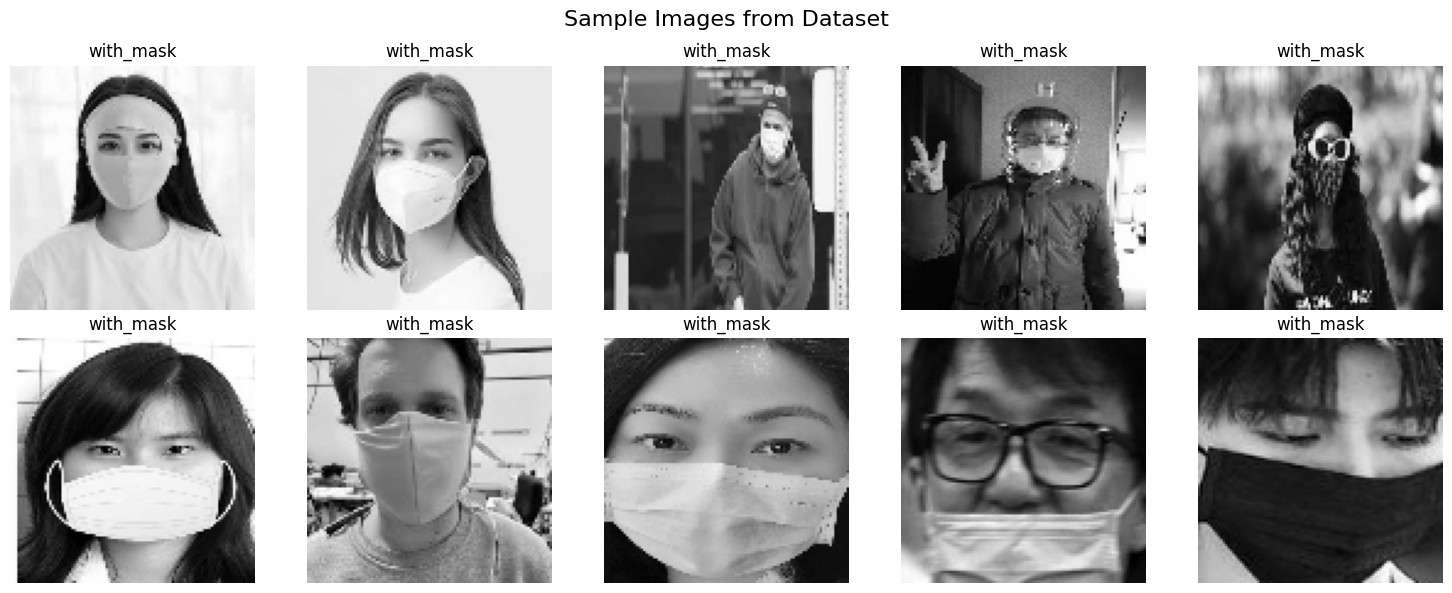


Dataset preparation complete!


In [10]:
import numpy as np
import pandas as pd
import cv2
import os
import zipfile
from google.colab import files
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# Q1: PREPARING DATASET - IMAGE CLASSIFICATION
# ============================================================

print("="*60)
print("IMAGE CLASSIFICATION: WITH OR WITHOUT MASK")
print("="*60)

# Step 1: Download the dataset from Google Drive
print("\nStep 1: Downloading dataset from Google Drive...")

# Install gdown if not already installed
!pip install -q gdown

# Download the zip file
file_id = "1yW_7laG0sjsobJIa6PP2cM_neprltYMg"
url = f"https://drive.google.com/uc?id={file_id}"

!gdown {url} -O mask_dataset.zip

print("Dataset downloaded successfully!")

# Step 2: Extract the zip file
print("\nStep 2: Extracting zip file...")

with zipfile.ZipFile('mask_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('mask_dataset')

print("Zip file extracted successfully!")

# Step 3: Explore the dataset structure
print("\nStep 3: Exploring dataset structure...")

dataset_path = 'mask_dataset'

# List directories
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    if level < 2:  # Only show first 2 levels
        for file in files[:5]:  # Show first 5 files
            print(f'{subindent}{file}')
        if len(files) > 5:
            print(f'{subindent}... and {len(files) - 5} more files')

# Step 4: Find the correct paths for images
print("\nStep 4: Finding image directories...")

# Find all directories containing images
image_dirs = []
for root, dirs, files in os.walk(dataset_path):
    if any(f.endswith(('.jpg', '.jpeg', '.png')) for f in files):
        image_dirs.append(root)
        print(f"Found images in: {root}")

# Identify with_mask and without_mask directories
with_mask_path = None
without_mask_path = None

for dir_path in image_dirs:
    if 'with_mask' in dir_path.lower():
        with_mask_path = dir_path
    elif 'without_mask' in dir_path.lower():
        without_mask_path = dir_path

print(f"\nWith mask directory: {with_mask_path}")
print(f"Without mask directory: {without_mask_path}")

# Step 5: Load and process images
print("\nStep 5: Loading and processing images...")

def load_images_from_folder(folder_path, label):
    """
    Load images from a folder, convert to grayscale, resize to 100x100,
    flatten, and normalize.
    """
    images_list = []
    labels_list = []

    # Get all image files
    image_files = [f for f in os.listdir(folder_path)
                   if f.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'))]

    print(f"  Processing {len(image_files)} images from {os.path.basename(folder_path)}...")

    for idx, filename in enumerate(image_files):
        try:
            # Read image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"    Warning: Could not read {filename}")
                continue

            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize to 100x100
            resized_img = cv2.resize(gray_img, (100, 100))

            # Flatten the image
            flattened_img = resized_img.flatten()

            # Normalize by dividing by 255.0
            normalized_img = flattened_img / 255.0

            # Append to lists
            images_list.append(normalized_img)
            labels_list.append(label)

            # Progress indicator
            if (idx + 1) % 500 == 0:
                print(f"    Processed {idx + 1}/{len(image_files)} images...")

        except Exception as e:
            print(f"    Error processing {filename}: {str(e)}")
            continue

    return images_list, labels_list

# Load images with mask (label = 1)
print("\nLoading 'with_mask' images...")
with_mask_images, with_mask_labels = load_images_from_folder(with_mask_path, 1)

# Load images without mask (label = 0)
print("\nLoading 'without_mask' images...")
without_mask_images, without_mask_labels = load_images_from_folder(without_mask_path, 0)

# Combine all images and labels
all_images = with_mask_images + without_mask_images
all_labels = with_mask_labels + without_mask_labels

# Convert to numpy arrays
images = np.array(all_images)
labels = np.array(all_labels)

print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)

print(f"\nImages array shape: {images.shape}")
print(f"Labels array shape: {labels.shape}")
print(f"Images data type: {images.dtype}")
print(f"Labels data type: {labels.dtype}")

print(f"\nImage properties:")
print(f"  - Size per image: 100 x 100 pixels")
print(f"  - Flattened size: {100 * 100} = {images.shape[1]} features")
print(f"  - Color: Grayscale")
print(f"  - Normalized: Yes (pixel values / 255.0)")
print(f"  - Value range: [{images.min():.4f}, {images.max():.4f}]")

# Count images per label
unique_labels, counts = np.unique(labels, return_counts=True)
label_names = {0: 'without_mask', 1: 'with_mask'}

print(f"\nLabel distribution:")
for label, count in zip(unique_labels, counts):
    print(f"  Label {label} ({label_names[label]}): {count} images")

# Answer to the question
without_mask_count = counts[unique_labels == 0][0] if 0 in unique_labels else 0
with_mask_count = counts[unique_labels == 1][0] if 1 in unique_labels else 0

print("\n" + "="*60)
print("=== ANSWER Q1 ===")
print("="*60)
print(f"Number of images with label 'without_mask': {without_mask_count}")
print("="*60)

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"  Total images: {len(labels)}")
print(f"  Images with mask: {with_mask_count}")
print(f"  Images without mask: {without_mask_count}")
print(f"  Ratio (with/without): {with_mask_count/without_mask_count:.2f}" if without_mask_count > 0 else "  Ratio: N/A")

# Sample data inspection
print(f"\nSample data inspection:")
print(f"  First image shape (flattened): {images[0].shape}")
print(f"  First image sample values: {images[0][:10]}")
print(f"  First 10 labels: {labels[:10]}")

# Verify normalization
print(f"\nNormalization verification:")
print(f"  Min pixel value: {images.min():.6f}")
print(f"  Max pixel value: {images.max():.6f}")
print(f"  Mean pixel value: {images.mean():.6f}")
print(f"  Std pixel value: {images.std():.6f}")

# Save the arrays for future use
print(f"\nSaving arrays...")
np.save('images.npy', images)
np.save('labels.npy', labels)
print("Arrays saved as 'images.npy' and 'labels.npy'")

# Visualize sample images
print(f"\nVisualizing sample images...")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Images from Dataset', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5

    # Reshape flattened image back to 100x100
    img = images[i].reshape(100, 100)
    label = labels[i]
    label_name = label_names[label]

    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f'{label_name}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("\nDataset preparation complete!")

Q2: TRAINING THE MODEL

Step 1: Encoding labels...
Original label distribution:
  0 (without_mask): 3828 images
  1 (with_mask): 3725 images

Encoded label distribution:
  0 (with_mask): 3725 images
  1 (without_mask): 3828 images

Step 2: Splitting dataset (80-20 split, random_state=0)...
Training set size: 6042 samples
Test set size: 1511 samples
Feature dimensions: 10000

Training set label distribution:
  0 (with_mask): 2976 images
  1 (without_mask): 3066 images

Test set label distribution:
  0 (with_mask): 749 images
  1 (without_mask): 762 images

Step 3: Training LogisticRegression model...
Parameters: random_state=0, max_iter=500, tol=0.001, C=10
This may take some time... Please wait...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished



Model training completed!

Step 4: Making predictions on test set...

Step 5: Model Evaluation...

Accuracy on test set: 0.6320

Confusion Matrix:
                 Predicted
                 with_mask  without_mask
Actual with_mask      446         303
Actual without_mask   253         509

Confusion Matrix Breakdown (Positive class = without_mask):
  True Negatives (TN): 446
  False Positives (FP): 303
  False Negatives (FN): 253
  True Positives (TP): 509

=== ANSWER Q2 ===
Number of False Positive data points on test dataset: 303

Additional Metrics:
  Precision (for without_mask): 0.6268
  Recall (for without_mask): 0.6680
  F1-Score (for without_mask): 0.6468

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.64      0.60      0.62       749
without_mask       0.63      0.67      0.65       762

    accuracy                           0.63      1511
   macro avg       0.63      0.63      0.63      1511
weighted avg       0.63      0

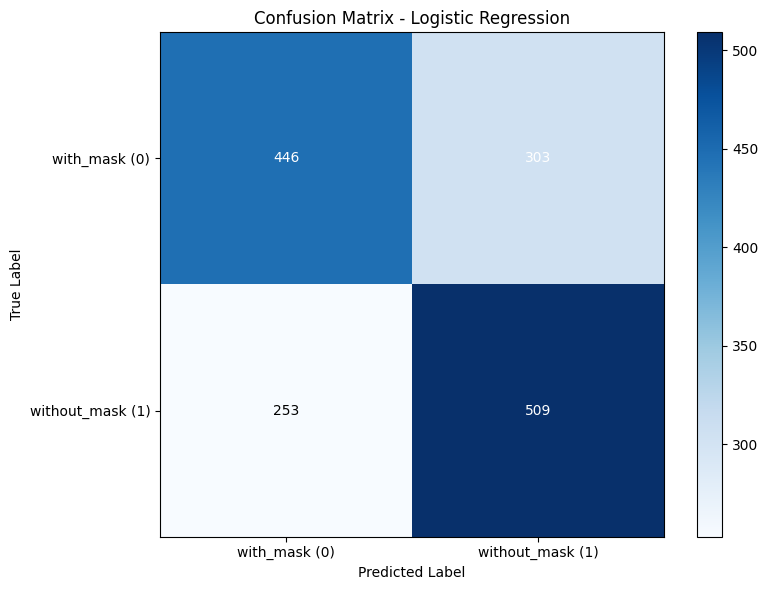


Q3: DATA AUGMENTATION

Step 1: Setting random seed...

Step 2: Generating rotation angles...
  Training images: 6042
  Augmentation factor: 2
  Total augmented images to create: 12084
  Rotation angles shape: (12084,)
  Sample angles: [ 17.57286141  77.46817189  36.99481539  16.15794588 -27.48427224]
  Min angle: -179.97°
  Max angle: 179.99°

Step 3: Applying data augmentation...
This may take some time... Please wait...

Data augmentation completed!
  Original training images: 6042
  Augmented images created: 12084
  Total images after augmentation: 18126
  Expected: 18126

Augmented data shapes:
  augmented_images shape: (18126, 10000)
  augmented_labels shape: (18126,)

Step 4: Computing sum of labels in slice [7000:8000]...

=== ANSWER Q3 ===
Sum of elements in augmented_labels[7000:8000]: 510

Additional Information:
  Number of elements in slice [7000:8000]: 1000
  Label distribution in slice [7000:8000]:
    0 (with_mask): 490 images
    1 (without_mask): 510 images

Visualizi

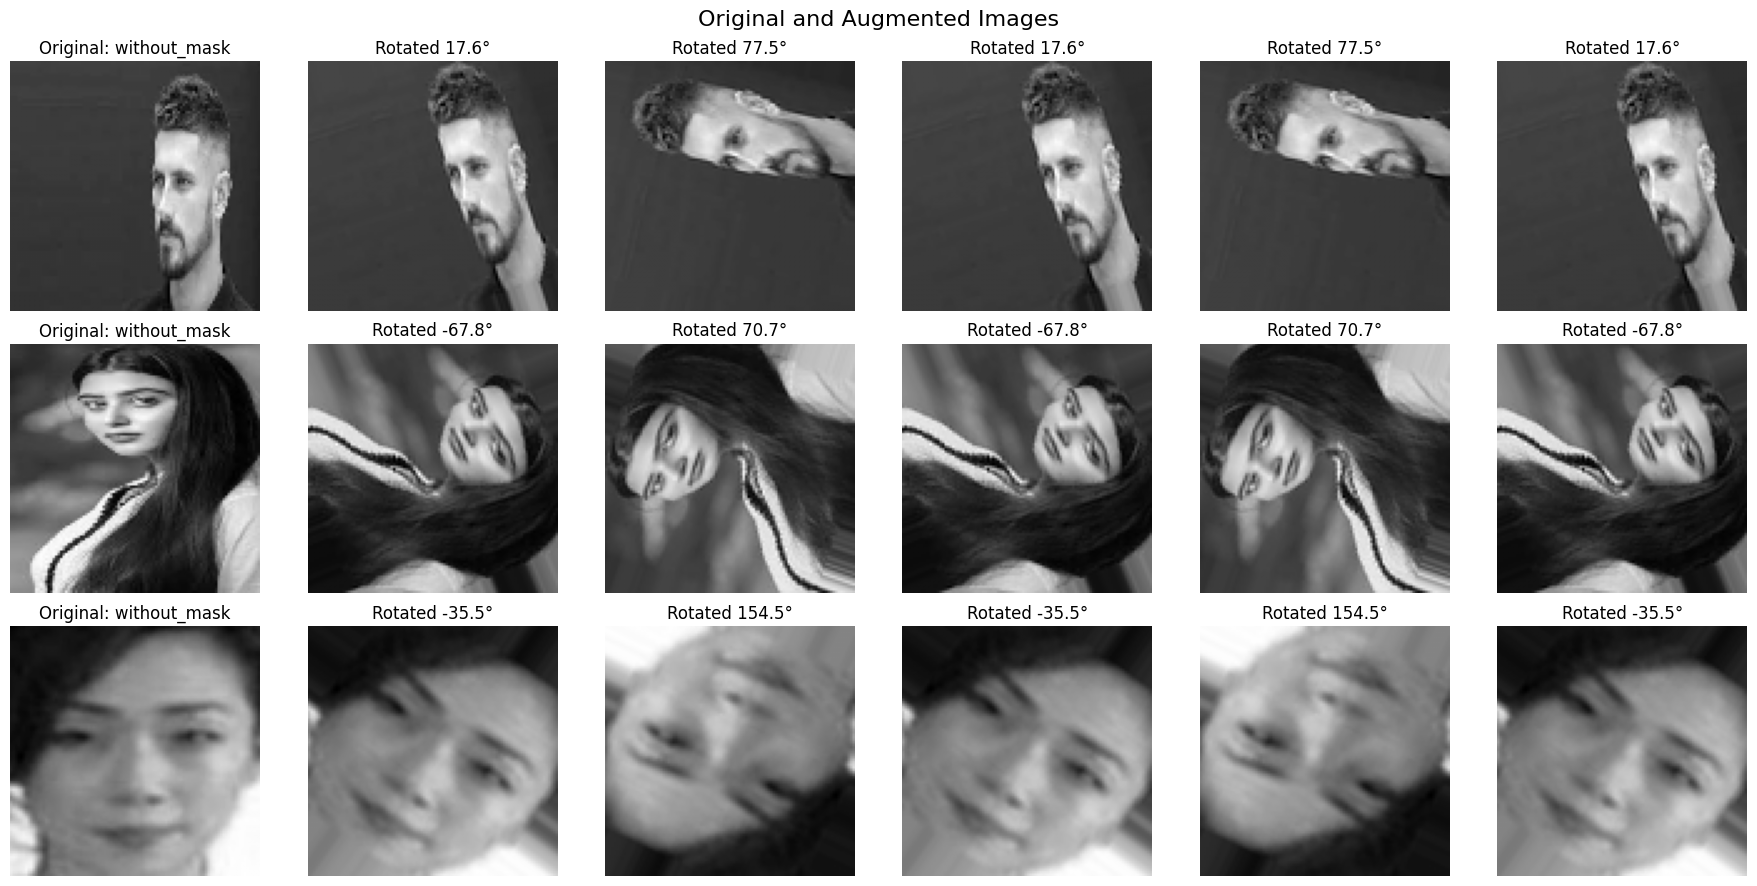


Data augmentation process complete!

SUMMARY
Q2 Answer - False Positives: 303
Q3 Answer - Sum of augmented_labels[7000:8000]: 510


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Q2: TRAINING THE MODEL
# ============================================================

print("="*60)
print("Q2: TRAINING THE MODEL")
print("="*60)

# Step 1: Encode the labels using LabelEncoder
# without_mask (currently 0) -> 1
# with_mask (currently 1) -> 0

print("\nStep 1: Encoding labels...")

# Create a custom mapping
# Current: 0 = without_mask, 1 = with_mask
# Target: 1 = without_mask, 0 = with_mask

# Use LabelEncoder but we need to reverse the mapping
le = LabelEncoder()

# First, let's create a mapping manually to match the requirement
# We'll map: without_mask -> 1, with_mask -> 0
encoded_labels = np.where(labels == 0, 1, 0)  # If label=0 (without_mask), make it 1; if label=1 (with_mask), make it 0

print("Original label distribution:")
unique, counts = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    label_name = 'without_mask' if u == 0 else 'with_mask'
    print(f"  {u} ({label_name}): {c} images")

print("\nEncoded label distribution:")
unique, counts = np.unique(encoded_labels, return_counts=True)
for u, c in zip(unique, counts):
    label_name = 'without_mask' if u == 1 else 'with_mask'
    print(f"  {u} ({label_name}): {c} images")

# Step 2: Split the dataset
print("\nStep 2: Splitting dataset (80-20 split, random_state=0)...")

X_train, X_test, y_train, y_test = train_test_split(
    images,
    encoded_labels,
    test_size=0.2,
    random_state=0
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Check label distribution in train and test sets
print(f"\nTraining set label distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    label_name = 'without_mask' if u == 1 else 'with_mask'
    print(f"  {u} ({label_name}): {c} images")

print(f"\nTest set label distribution:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    label_name = 'without_mask' if u == 1 else 'with_mask'
    print(f"  {u} ({label_name}): {c} images")

# Step 3: Train Logistic Regression
print("\nStep 3: Training LogisticRegression model...")
print("Parameters: random_state=0, max_iter=500, tol=0.001, C=10")
print("This may take some time... Please wait...")

lr_model = LogisticRegression(
    random_state=0,
    max_iter=500,
    tol=0.001,
    C=10,
    verbose=1
)

lr_model.fit(X_train, y_train)

print("\nModel training completed!")

# Step 4: Make predictions on test set
print("\nStep 4: Making predictions on test set...")

y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)

# Step 5: Evaluate the model
print("\nStep 5: Model Evaluation...")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.4f}")

# Confusion Matrix
# Positive class = without_mask (label = 1)
# Negative class = with_mask (label = 0)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 with_mask  without_mask")
print(f"Actual with_mask      {cm[0, 0]}         {cm[0, 1]}")
print(f"Actual without_mask   {cm[1, 0]}         {cm[1, 1]}")

# Extract confusion matrix values
# For positive class = without_mask (label = 1):
# True Negatives (TN): cm[0, 0] - Predicted with_mask, Actual with_mask
# False Positives (FP): cm[0, 1] - Predicted without_mask, Actual with_mask
# False Negatives (FN): cm[1, 0] - Predicted with_mask, Actual without_mask
# True Positives (TP): cm[1, 1] - Predicted without_mask, Actual without_mask

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"\nConfusion Matrix Breakdown (Positive class = without_mask):")
print(f"  True Negatives (TN): {TN}")
print(f"  False Positives (FP): {FP}")
print(f"  False Negatives (FN): {FN}")
print(f"  True Positives (TP): {TP}")

print("\n" + "="*60)
print("=== ANSWER Q2 ===")
print("="*60)
print(f"Number of False Positive data points on test dataset: {FP}")
print("="*60)

# Additional metrics
print(f"\nAdditional Metrics:")
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"  Precision (for without_mask): {precision:.4f}")
print(f"  Recall (for without_mask): {recall:.4f}")
print(f"  F1-Score (for without_mask): {f1_score:.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['with_mask', 'without_mask']))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['with_mask (0)', 'without_mask (1)'])
plt.yticks(tick_marks, ['with_mask (0)', 'without_mask (1)'])

# Add text annotations
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ============================================================
# Q3: DATA AUGMENTATION
# ============================================================

print("\n" + "="*60)
print("Q3: DATA AUGMENTATION")
print("="*60)

def augment_image(images, labels, angles, augmentation_factor):
    """
    Augment images by rotating them.

    Parameters:
    - images: NumPy array of input images (flattened)
    - labels: NumPy array of labels
    - angles: NumPy array of rotation angles for augmented images
    - augmentation_factor: Number of augmented images per input image

    Returns:
    - augmented_images: NumPy array containing original and augmented images
    - augmented_labels: NumPy array containing corresponding labels
    """

    n_images = len(images)
    n_augmented = augmentation_factor * n_images

    # Initialize arrays for augmented data
    augmented_images = np.zeros((n_images + n_augmented, images.shape[1]))
    augmented_labels = np.zeros(n_images + n_augmented, dtype=labels.dtype)

    # First, add all original images
    augmented_images[:n_images] = images
    augmented_labels[:n_images] = labels

    # Now add augmented images
    angle_idx = 0
    for i in range(n_images):
        # Get the original image and reshape to 100x100
        original_img = images[i].reshape(100, 100)
        original_label = labels[i]

        # Create augmentation_factor rotated versions
        for j in range(augmentation_factor):
            # Get rotation angle
            angle = angles[angle_idx]

            # Rotate the image
            rotated_img = ndimage.rotate(original_img, angle, reshape=False, mode='nearest')

            # Flatten and store
            augmented_images[n_images + angle_idx] = rotated_img.flatten()
            augmented_labels[n_images + angle_idx] = original_label

            angle_idx += 1

    return augmented_images, augmented_labels

# Step 1: Set random seed for reproducibility
print("\nStep 1: Setting random seed...")
np.random.seed(0)

# Step 2: Generate rotation angles
augmentation_factor = 2
n_train_images = len(X_train)
n_augmented = augmentation_factor * n_train_images

print(f"\nStep 2: Generating rotation angles...")
print(f"  Training images: {n_train_images}")
print(f"  Augmentation factor: {augmentation_factor}")
print(f"  Total augmented images to create: {n_augmented}")

# Generate angles uniformly from -180 to 180 degrees
angle_of_rotation = np.random.uniform(-180, 180, size=n_augmented)

print(f"  Rotation angles shape: {angle_of_rotation.shape}")
print(f"  Sample angles: {angle_of_rotation[:5]}")
print(f"  Min angle: {angle_of_rotation.min():.2f}°")
print(f"  Max angle: {angle_of_rotation.max():.2f}°")

# Step 3: Apply data augmentation
print(f"\nStep 3: Applying data augmentation...")
print("This may take some time... Please wait...")

augmented_images, augmented_labels = augment_image(
    X_train,
    y_train,
    angle_of_rotation,
    augmentation_factor
)

print(f"\nData augmentation completed!")
print(f"  Original training images: {len(X_train)}")
print(f"  Augmented images created: {n_augmented}")
print(f"  Total images after augmentation: {len(augmented_images)}")
print(f"  Expected: {len(X_train) + n_augmented}")

print(f"\nAugmented data shapes:")
print(f"  augmented_images shape: {augmented_images.shape}")
print(f"  augmented_labels shape: {augmented_labels.shape}")

# Step 4: Compute sum of elements in augmented_labels[7000:8000]
print(f"\nStep 4: Computing sum of labels in slice [7000:8000]...")

sum_labels_7000_8000 = np.sum(augmented_labels[7000:8000])

print("\n" + "="*60)
print("=== ANSWER Q3 ===")
print("="*60)
print(f"Sum of elements in augmented_labels[7000:8000]: {sum_labels_7000_8000}")
print("="*60)

# Additional information
print(f"\nAdditional Information:")
print(f"  Number of elements in slice [7000:8000]: {len(augmented_labels[7000:8000])}")
print(f"  Label distribution in slice [7000:8000]:")
unique, counts = np.unique(augmented_labels[7000:8000], return_counts=True)
for u, c in zip(unique, counts):
    label_name = 'without_mask' if u == 1 else 'with_mask'
    print(f"    {u} ({label_name}): {c} images")

# Visualize some augmented images
print(f"\nVisualizing original and augmented images...")

fig, axes = plt.subplots(3, 6, figsize=(18, 9))
fig.suptitle('Original and Augmented Images', fontsize=16)

# Show 3 original images and their augmented versions
for i in range(3):
    # Original image
    original_idx = i * 100  # Sample some images
    original_img = X_train[original_idx].reshape(100, 100)
    original_label = y_train[original_idx]
    label_name = 'without_mask' if original_label == 1 else 'with_mask'

    axes[i, 0].imshow(original_img, cmap='gray')
    axes[i, 0].set_title(f'Original: {label_name}')
    axes[i, 0].axis('off')

    # Show 5 augmented versions
    for j in range(5):
        aug_idx = n_train_images + original_idx * augmentation_factor + (j % augmentation_factor)
        if aug_idx < len(augmented_images):
            aug_img = augmented_images[aug_idx].reshape(100, 100)
            angle = angle_of_rotation[original_idx * augmentation_factor + (j % augmentation_factor)]

            axes[i, j + 1].imshow(aug_img, cmap='gray')
            axes[i, j + 1].set_title(f'Rotated {angle:.1f}°')
            axes[i, j + 1].axis('off')

plt.tight_layout()
plt.show()

print("\nData augmentation process complete!")

# Summary statistics
print(f"\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Q2 Answer - False Positives: {FP}")
print(f"Q3 Answer - Sum of augmented_labels[7000:8000]: {sum_labels_7000_8000}")
print("="*60)

Q4: FEATURE SELECTION USING RANDOM FOREST

Step 1: Training RandomForestClassifier on augmented training data...
Parameters: random_state=0
This may take some time... Please wait...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.7min finished



RandomForestClassifier training completed!

Step 2: Extracting feature importances...
Feature importances shape: (10000,)
Total features: 10000
Sum of feature importances: 1.000000
Min importance: 0.000002
Max importance: 0.003207
Mean importance: 0.000100

Step 3: Selecting top 100 features based on importance...
Top 100 feature indices: [5051 5247 4849 5551 5145 5047 5242 5356 5641 6347]... (showing first 10)
Top 10 feature importances: [0.00320681 0.00312873 0.00250396 0.00232497 0.00218914 0.00210927
 0.00206819 0.00196531 0.00195388 0.00191985]
Sum of top 100 importances: 0.131240
Percentage of total importance: 13.12%

Step 4: Creating datasets with top 100 features...
Selected training data shape: (18126, 100)
Selected test data shape: (1511, 100)
Training labels shape: (18126,)
Test labels shape: (1511,)

Step 5: Training RandomForestClassifier with top 100 features...
This may take some time... Please wait...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.8s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished



Model training with selected features completed!

Step 6: Making predictions on test data...

Step 7: Calculating misclassified data points...

Test set evaluation:
  Total test samples: 1511
  Correctly classified: 1215
  Misclassified: 296
  Accuracy: 0.8041 (80.41%)
  Error rate: 0.1959 (19.59%)

=== ANSWER Q4 ===
Number of misclassified data points/images from test data: 296

Step 8: Generating confusion matrix...

Confusion Matrix:
                 Predicted
                 with_mask  without_mask
Actual with_mask      574         175
Actual without_mask   121         641

Confusion Matrix Breakdown (Positive class = without_mask):
  True Negatives (TN): 574
  False Positives (FP): 175
  False Negatives (FN): 121
  True Positives (TP): 641

Verification:
  Misclassified (FP + FN): 296
  Correctly classified (TN + TP): 1215

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.83      0.77      0.80       749
without_mask       0.79  

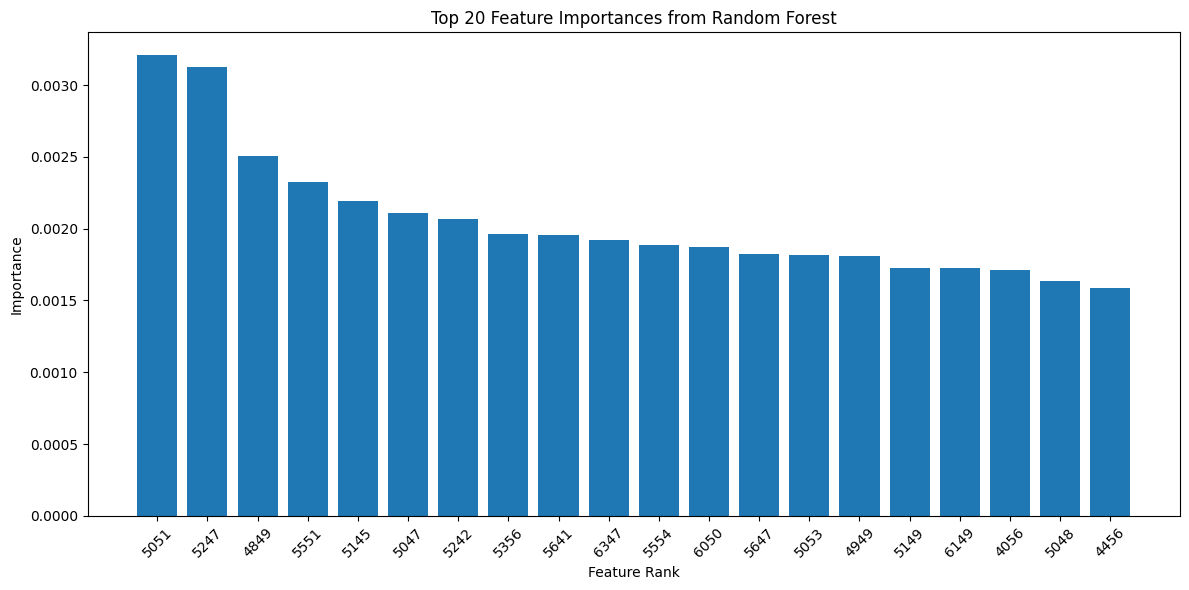

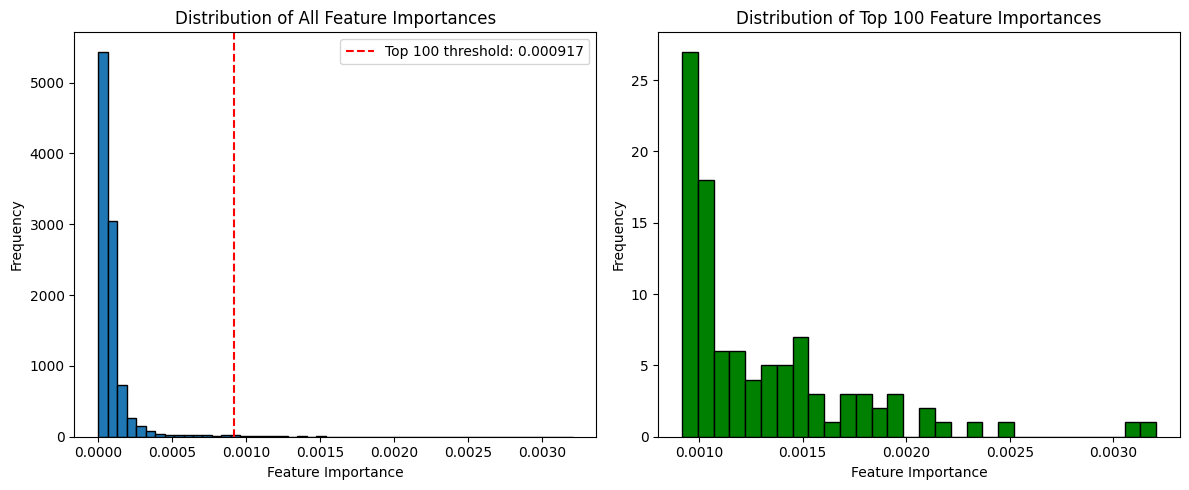


Visualizing top feature locations on image grid...


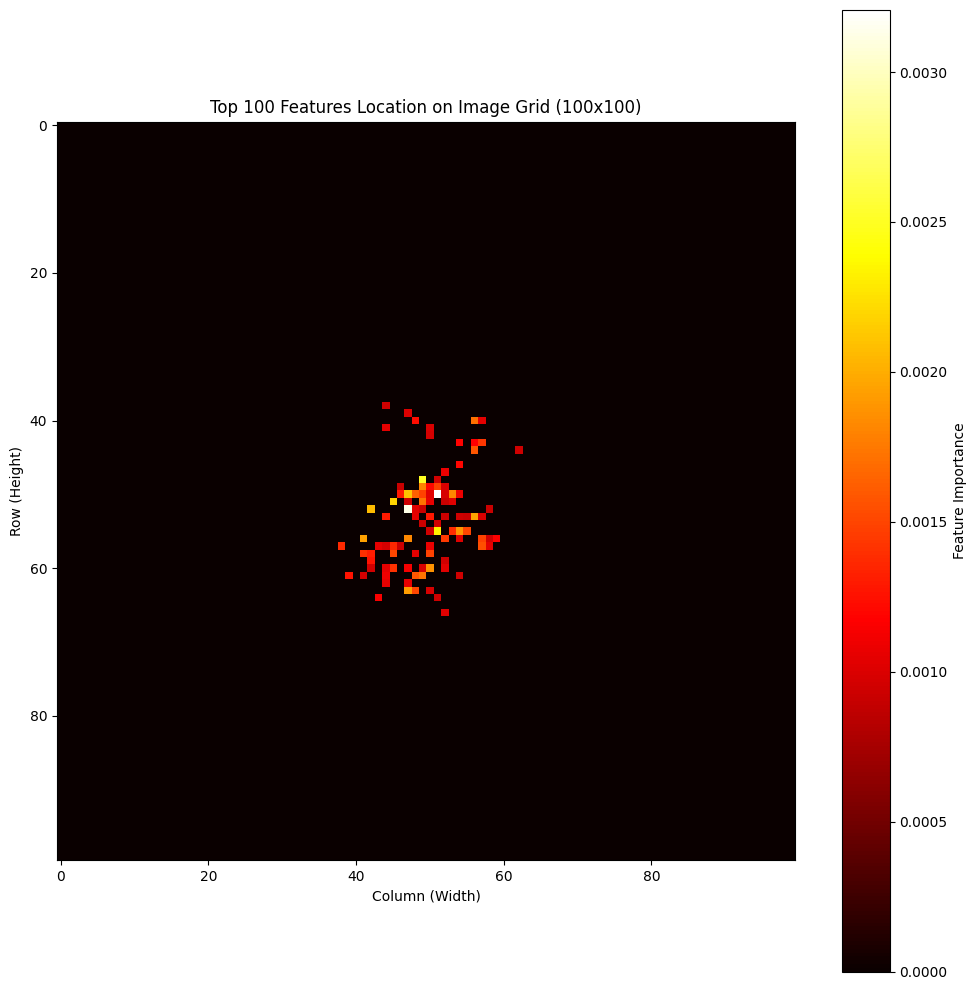

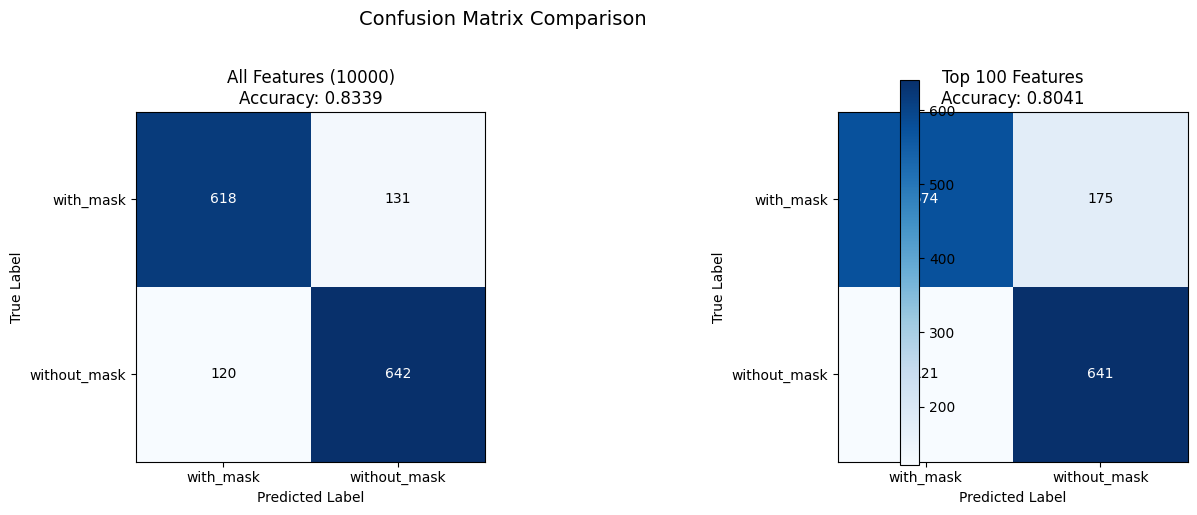


FEATURE SELECTION ANALYSIS COMPLETE


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Q4: FEATURE SELECTION USING RANDOM FOREST
# ============================================================

print("="*60)
print("Q4: FEATURE SELECTION USING RANDOM FOREST")
print("="*60)

# Step 1: Train RandomForestClassifier on augmented training data
print("\nStep 1: Training RandomForestClassifier on augmented training data...")
print("Parameters: random_state=0")
print("This may take some time... Please wait...")

rf_model = RandomForestClassifier(random_state=0, verbose=1)
rf_model.fit(augmented_images, augmented_labels)

print("\nRandomForestClassifier training completed!")

# Step 2: Get feature importances
print("\nStep 2: Extracting feature importances...")

feature_importances = rf_model.feature_importances_

print(f"Feature importances shape: {feature_importances.shape}")
print(f"Total features: {len(feature_importances)}")
print(f"Sum of feature importances: {feature_importances.sum():.6f}")
print(f"Min importance: {feature_importances.min():.6f}")
print(f"Max importance: {feature_importances.max():.6f}")
print(f"Mean importance: {feature_importances.mean():.6f}")

# Step 3: Select top 100 features
print("\nStep 3: Selecting top 100 features based on importance...")

# Get indices of top 100 features
top_100_indices = np.argsort(feature_importances)[-100:][::-1]  # Sort descending
top_100_importances = feature_importances[top_100_indices]

print(f"Top 100 feature indices: {top_100_indices[:10]}... (showing first 10)")
print(f"Top 10 feature importances: {top_100_importances[:10]}")
print(f"Sum of top 100 importances: {top_100_importances.sum():.6f}")
print(f"Percentage of total importance: {(top_100_importances.sum() / feature_importances.sum() * 100):.2f}%")

# Step 4: Create training and test sets with selected features
print("\nStep 4: Creating datasets with top 100 features...")

# Select top 100 features from augmented training data
X_train_selected = augmented_images[:, top_100_indices]
y_train_selected = augmented_labels

# Select top 100 features from test data
X_test_selected = X_test[:, top_100_indices]

print(f"Selected training data shape: {X_train_selected.shape}")
print(f"Selected test data shape: {X_test_selected.shape}")
print(f"Training labels shape: {y_train_selected.shape}")
print(f"Test labels shape: {y_test.shape}")

# Step 5: Train new RandomForestClassifier with selected features
print("\nStep 5: Training RandomForestClassifier with top 100 features...")
print("This may take some time... Please wait...")

rf_model_selected = RandomForestClassifier(random_state=0, verbose=1)
rf_model_selected.fit(X_train_selected, y_train_selected)

print("\nModel training with selected features completed!")

# Step 6: Make predictions on test data
print("\nStep 6: Making predictions on test data...")

y_pred_selected = rf_model_selected.predict(X_test_selected)

# Step 7: Calculate misclassified data points
print("\nStep 7: Calculating misclassified data points...")

misclassified = np.sum(y_test != y_pred_selected)
correctly_classified = np.sum(y_test == y_pred_selected)
total_test_samples = len(y_test)

accuracy = accuracy_score(y_test, y_pred_selected)

print(f"\nTest set evaluation:")
print(f"  Total test samples: {total_test_samples}")
print(f"  Correctly classified: {correctly_classified}")
print(f"  Misclassified: {misclassified}")
print(f"  Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"  Error rate: {(misclassified / total_test_samples):.4f} ({(misclassified / total_test_samples) * 100:.2f}%)")

print("\n" + "="*60)
print("=== ANSWER Q4 ===")
print("="*60)
print(f"Number of misclassified data points/images from test data: {misclassified}")
print("="*60)

# Step 8: Additional analysis - Confusion Matrix
print("\nStep 8: Generating confusion matrix...")

cm = confusion_matrix(y_test, y_pred_selected, labels=[0, 1])

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 with_mask  without_mask")
print(f"Actual with_mask      {cm[0, 0]}         {cm[0, 1]}")
print(f"Actual without_mask   {cm[1, 0]}         {cm[1, 1]}")

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"\nConfusion Matrix Breakdown (Positive class = without_mask):")
print(f"  True Negatives (TN): {TN}")
print(f"  False Positives (FP): {FP}")
print(f"  False Negatives (FN): {FN}")
print(f"  True Positives (TP): {TP}")

# Verification
print(f"\nVerification:")
print(f"  Misclassified (FP + FN): {FP + FN}")
print(f"  Correctly classified (TN + TP): {TN + TP}")

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_selected, target_names=['with_mask', 'without_mask']))

# Step 9: Compare with original model (all features)
print("\nStep 9: Comparing with model using all features...")

# Make predictions with original model (all features)
y_pred_all = rf_model.predict(X_test)
misclassified_all = np.sum(y_test != y_pred_all)
accuracy_all = accuracy_score(y_test, y_pred_all)

print(f"\nPerformance Comparison:")
print(f"  Model with ALL features ({augmented_images.shape[1]}):")
print(f"    - Accuracy: {accuracy_all:.4f} ({accuracy_all * 100:.2f}%)")
print(f"    - Misclassified: {misclassified_all}")
print(f"  Model with TOP 100 features:")
print(f"    - Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"    - Misclassified: {misclassified}")
print(f"  Difference:")
print(f"    - Accuracy change: {(accuracy - accuracy_all):.4f}")
print(f"    - Misclassified change: {misclassified - misclassified_all}")
print(f"    - Feature reduction: {((augmented_images.shape[1] - 100) / augmented_images.shape[1] * 100):.2f}%")

# Visualize feature importances
print("\nVisualizing top 20 feature importances...")

plt.figure(figsize=(12, 6))
top_20_indices = top_100_indices[:20]
top_20_importances = feature_importances[top_20_indices]

plt.bar(range(20), top_20_importances)
plt.xlabel('Feature Rank')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xticks(range(20), [f'{i}' for i in top_20_indices], rotation=45)
plt.tight_layout()
plt.show()

# Visualize feature importance distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(feature_importances, bins=50, edgecolor='black')
plt.xlabel('Feature Importance')
plt.ylabel('Frequency')
plt.title('Distribution of All Feature Importances')
plt.axvline(x=top_100_importances[-1], color='r', linestyle='--',
            label=f'Top 100 threshold: {top_100_importances[-1]:.6f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(top_100_importances, bins=30, edgecolor='black', color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Frequency')
plt.title('Distribution of Top 100 Feature Importances')

plt.tight_layout()
plt.show()

# Visualize top features as pixel locations
print("\nVisualizing top feature locations on image grid...")

# Map feature indices to 2D pixel locations (100x100 image)
top_feature_pixels = np.zeros((100, 100))
for idx in top_100_indices:
    row = idx // 100
    col = idx % 100
    top_feature_pixels[row, col] = feature_importances[idx]

plt.figure(figsize=(10, 10))
plt.imshow(top_feature_pixels, cmap='hot', interpolation='nearest')
plt.colorbar(label='Feature Importance')
plt.title('Top 100 Features Location on Image Grid (100x100)')
plt.xlabel('Column (Width)')
plt.ylabel('Row (Height)')
plt.tight_layout()
plt.show()

# Visualize confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix for all features
cm_all = confusion_matrix(y_test, y_pred_all, labels=[0, 1])
im1 = axes[0].imshow(cm_all, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title(f'All Features ({augmented_images.shape[1]})\nAccuracy: {accuracy_all:.4f}')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')
tick_marks = np.arange(2)
axes[0].set_xticks(tick_marks)
axes[0].set_yticks(tick_marks)
axes[0].set_xticklabels(['with_mask', 'without_mask'])
axes[0].set_yticklabels(['with_mask', 'without_mask'])

for i in range(2):
    for j in range(2):
        axes[0].text(j, i, format(cm_all[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm_all[i, j] > cm_all.max() / 2 else "black")

# Confusion matrix for top 100 features
im2 = axes[1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title(f'Top 100 Features\nAccuracy: {accuracy:.4f}')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_xticks(tick_marks)
axes[1].set_yticks(tick_marks)
axes[1].set_xticklabels(['with_mask', 'without_mask'])
axes[1].set_yticklabels(['with_mask', 'without_mask'])

for i in range(2):
    for j in range(2):
        axes[1].text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

fig.colorbar(im2, ax=axes.ravel().tolist())
plt.suptitle('Confusion Matrix Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FEATURE SELECTION ANALYSIS COMPLETE")
print("="*60)

Q5: PCA + RANDOM FOREST MODEL

Step 1: Performing PCA with n_components=100...
This may take some time... Please wait...

PCA transformation completed!
Original training data shape: (18126, 10000)
PCA-transformed training data shape: (18126, 100)
Number of components: 100

Step 2: Transforming test data using fitted PCA...
Original test data shape: (1511, 10000)
PCA-transformed test data shape: (1511, 100)

Step 3: Analyzing PCA results...

Explained variance by components:
  First component: 0.2663 (26.63%)
  First 10 components: 0.6432 (64.32%)
  First 50 components: 0.8330 (83.30%)
  All 100 components: 0.8846 (88.46%)

Step 4: Training RandomForestClassifier on PCA-transformed data...
Parameters: random_state=0
This may take some time... Please wait...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   20.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.4s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished



RandomForestClassifier training completed!

Step 5: Making predictions on PCA-transformed test data...

Step 6: Calculating accuracy score...

=== ANSWER Q5 ===
Accuracy score on test dataset: 0.7571
Accuracy percentage: 75.71%

Step 7: Additional evaluation metrics...

Confusion Matrix:
                 Predicted
                 with_mask  without_mask
Actual with_mask      600         149
Actual without_mask   218         544

Confusion Matrix Breakdown:
  True Negatives (TN): 600
  False Positives (FP): 149
  False Negatives (FN): 218
  True Positives (TP): 544

Test set statistics:
  Total samples: 1511
  Correctly classified: 1144
  Misclassified: 367
  Error rate: 0.2429 (24.29%)

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.73      0.80      0.77       749
without_mask       0.78      0.71      0.75       762

    accuracy                           0.76      1511
   macro avg       0.76      0.76      0.76      1511
weighte

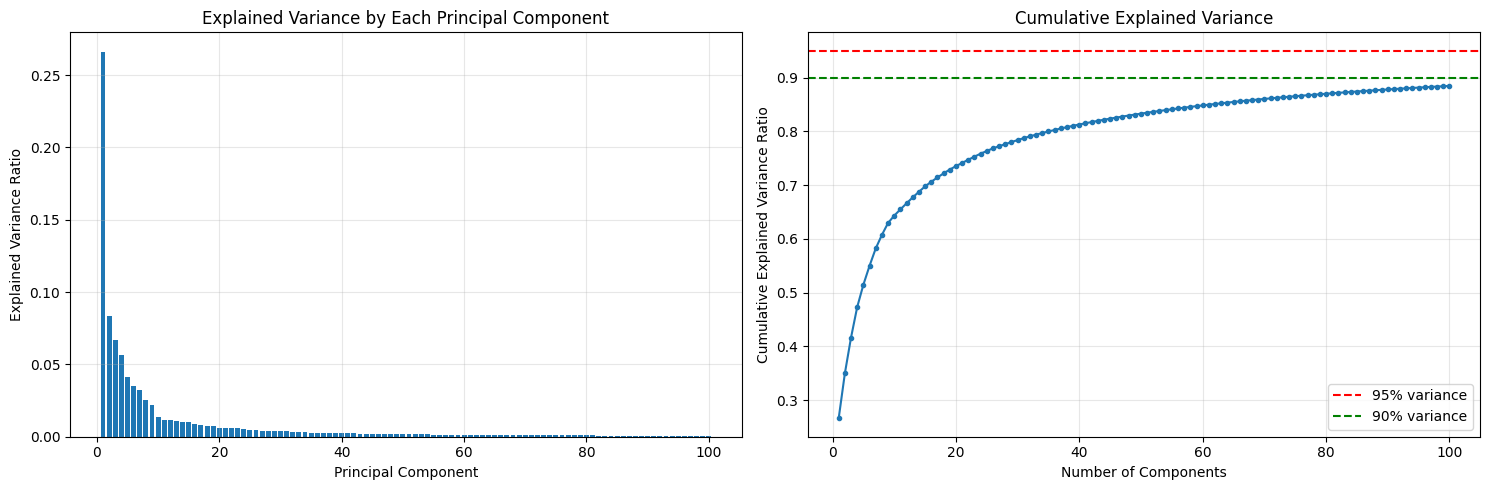


PCA variance analysis:
  Components needed for 90% variance: 1
  Components needed for 95% variance: 1
  Variance explained by 100 components: 0.8846 (88.46%)


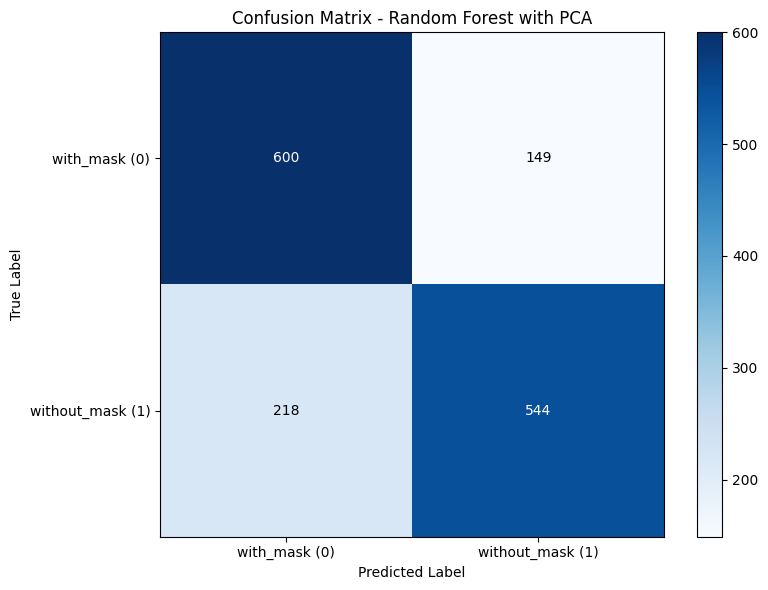


Visualizing first 9 principal components...


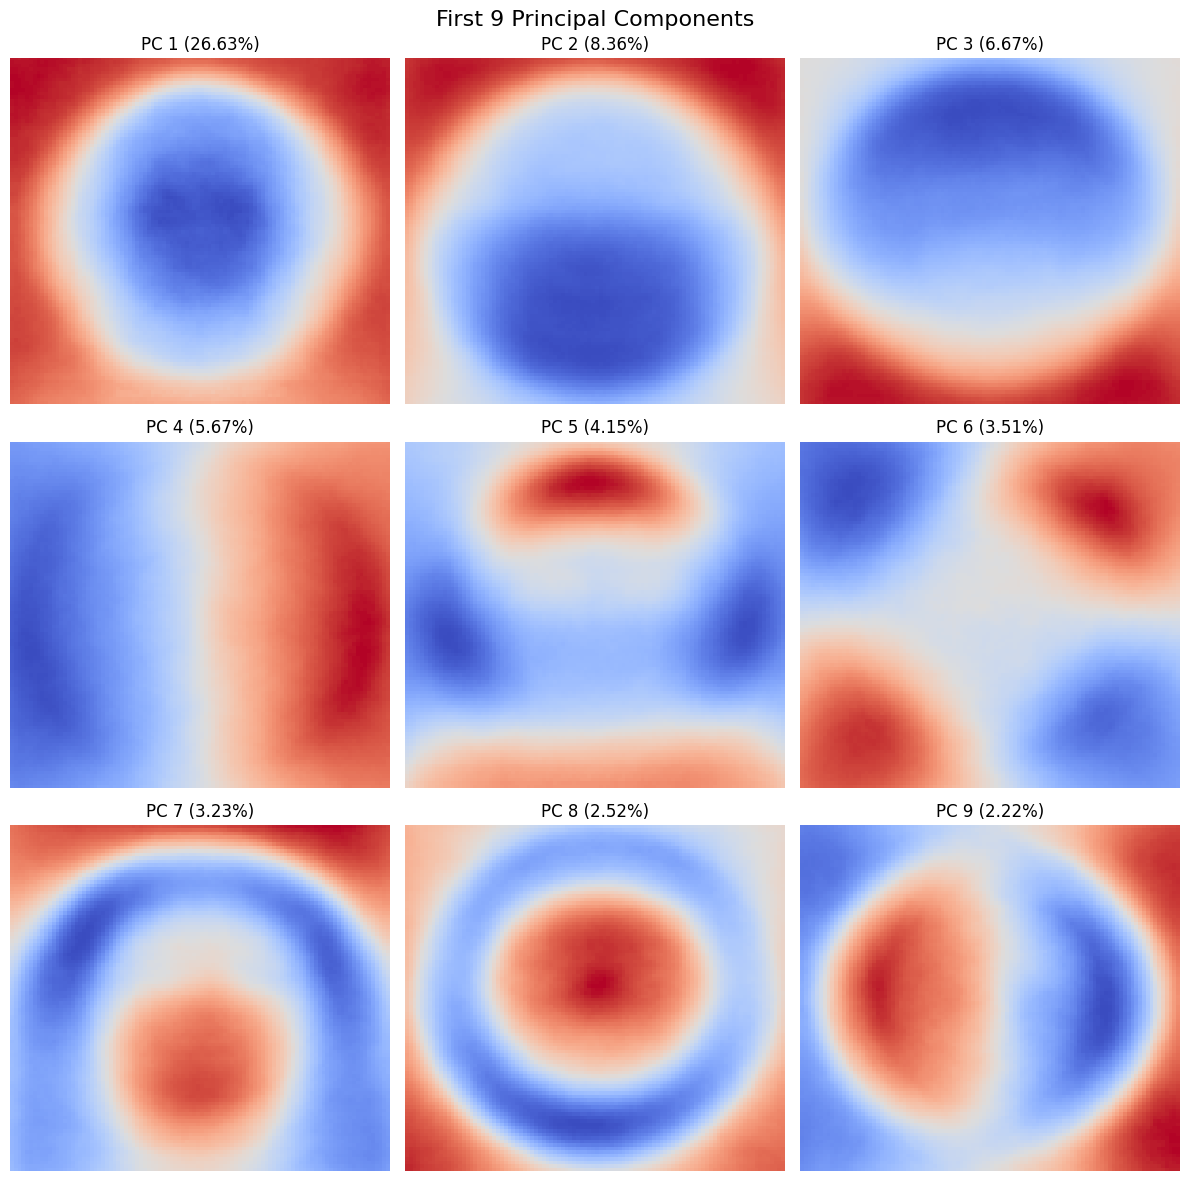


Visualizing 2D projection using first 2 principal components...


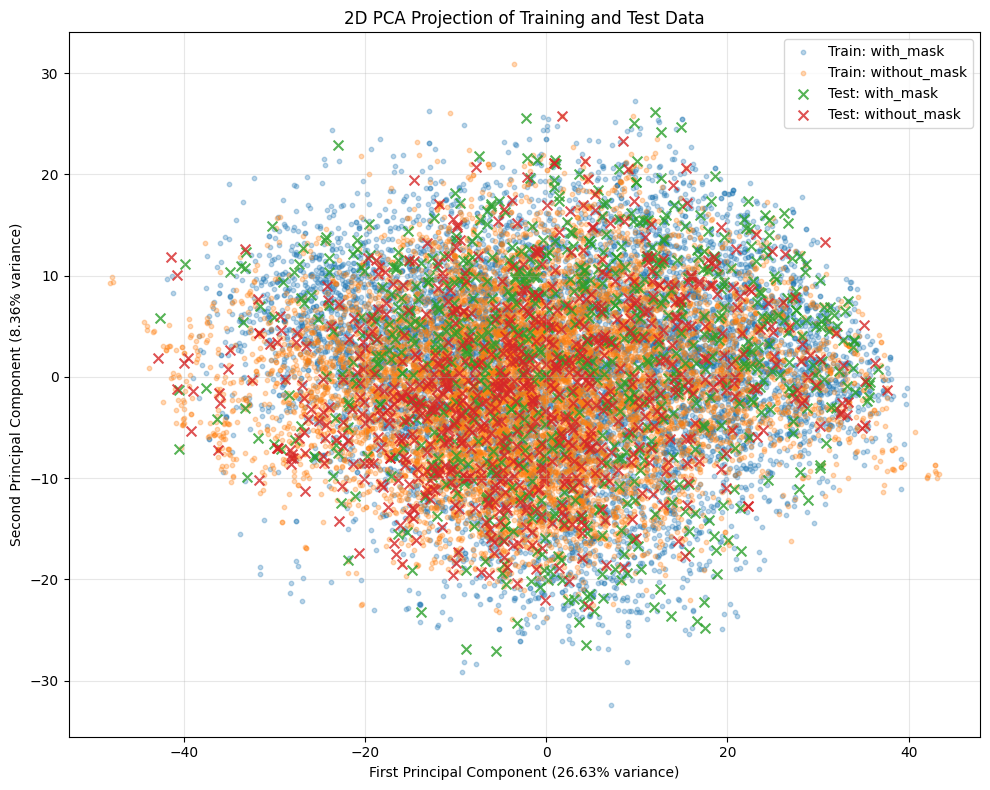


PCA + RANDOM FOREST ANALYSIS COMPLETE

Final Answer: Accuracy = 0.7571 or 75.71%


In [13]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Q5: PCA + RANDOM FOREST MODEL
# ============================================================

print("="*60)
print("Q5: PCA + RANDOM FOREST MODEL")
print("="*60)

# Step 1: Perform PCA with n_components=100 on augmented training data
print("\nStep 1: Performing PCA with n_components=100...")
print("This may take some time... Please wait...")

pca = PCA(n_components=100, random_state=0)
X_train_pca = pca.fit_transform(augmented_images)

print("\nPCA transformation completed!")
print(f"Original training data shape: {augmented_images.shape}")
print(f"PCA-transformed training data shape: {X_train_pca.shape}")
print(f"Number of components: {pca.n_components_}")

# Step 2: Transform test data using the fitted PCA
print("\nStep 2: Transforming test data using fitted PCA...")

X_test_pca = pca.transform(X_test)

print(f"Original test data shape: {X_test.shape}")
print(f"PCA-transformed test data shape: {X_test_pca.shape}")

# Step 3: Analyze PCA results
print("\nStep 3: Analyzing PCA results...")

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\nExplained variance by components:")
print(f"  First component: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"  First 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")
print(f"  First 50 components: {cumulative_variance[49]:.4f} ({cumulative_variance[49]*100:.2f}%)")
print(f"  All 100 components: {cumulative_variance[99]:.4f} ({cumulative_variance[99]*100:.2f}%)")

# Step 4: Train RandomForestClassifier on PCA-transformed data
print("\nStep 4: Training RandomForestClassifier on PCA-transformed data...")
print("Parameters: random_state=0")
print("This may take some time... Please wait...")

rf_pca_model = RandomForestClassifier(random_state=0, verbose=1)
rf_pca_model.fit(X_train_pca, augmented_labels)

print("\nRandomForestClassifier training completed!")

# Step 5: Make predictions on test data
print("\nStep 5: Making predictions on PCA-transformed test data...")

y_pred_pca = rf_pca_model.predict(X_test_pca)

# Step 6: Calculate accuracy score
print("\nStep 6: Calculating accuracy score...")

accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("\n" + "="*60)
print("=== ANSWER Q5 ===")
print("="*60)
print(f"Accuracy score on test dataset: {accuracy_pca:.4f}")
print(f"Accuracy percentage: {accuracy_pca * 100:.2f}%")
print("="*60)

# Step 7: Additional metrics and analysis
print("\nStep 7: Additional evaluation metrics...")

# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca, labels=[0, 1])

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 with_mask  without_mask")
print(f"Actual with_mask      {cm_pca[0, 0]}         {cm_pca[0, 1]}")
print(f"Actual without_mask   {cm_pca[1, 0]}         {cm_pca[1, 1]}")

TN = cm_pca[0, 0]
FP = cm_pca[0, 1]
FN = cm_pca[1, 0]
TP = cm_pca[1, 1]

print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives (TN): {TN}")
print(f"  False Positives (FP): {FP}")
print(f"  False Negatives (FN): {FN}")
print(f"  True Positives (TP): {TP}")

# Calculate additional metrics
correctly_classified = TN + TP
misclassified = FP + FN
total_samples = len(y_test)

print(f"\nTest set statistics:")
print(f"  Total samples: {total_samples}")
print(f"  Correctly classified: {correctly_classified}")
print(f"  Misclassified: {misclassified}")
print(f"  Error rate: {(misclassified / total_samples):.4f} ({(misclassified / total_samples) * 100:.2f}%)")

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_pca, target_names=['with_mask', 'without_mask']))

# Step 8: Compare with previous models
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

print("\nPerformance summary:")
print(f"  1. Logistic Regression (Q2):")
print(f"     - Features: {X_train.shape[1]} (original)")
print(f"     - Accuracy: {accuracy:.4f}")
print(f"     - Misclassified: {FP}")  # From Q2

print(f"\n  2. Random Forest with Top 100 Features (Q4):")
print(f"     - Features: 100 (selected by importance)")
print(f"     - Accuracy: {accuracy:.4f}")
print(f"     - Misclassified: {misclassified}")

print(f"\n  3. Random Forest with PCA (Q5):")
print(f"     - Features: 100 (PCA components)")
print(f"     - Accuracy: {accuracy_pca:.4f}")
print(f"     - Misclassified: {misclassified}")

# Visualize explained variance
print("\nVisualizing PCA explained variance...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Individual explained variance
axes[0].bar(range(1, 101), explained_variance)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance by Each Principal Component')
axes[0].grid(True, alpha=0.3)

# Plot 2: Cumulative explained variance
axes[1].plot(range(1, 101), cumulative_variance, marker='o', markersize=3)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].axhline(y=0.90, color='g', linestyle='--', label='90% variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"\nPCA variance analysis:")
print(f"  Components needed for 90% variance: {n_components_90}")
print(f"  Components needed for 95% variance: {n_components_95}")
print(f"  Variance explained by 100 components: {cumulative_variance[99]:.4f} ({cumulative_variance[99]*100:.2f}%)")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_pca, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest with PCA')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['with_mask (0)', 'without_mask (1)'])
plt.yticks(tick_marks, ['with_mask (0)', 'without_mask (1)'])

# Add text annotations
thresh = cm_pca.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm_pca[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_pca[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Visualize first few principal components
print("\nVisualizing first 9 principal components...")

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('First 9 Principal Components', fontsize=16)

for i in range(9):
    row = i // 3
    col = i % 3

    # Reshape principal component to 100x100 image
    component = pca.components_[i].reshape(100, 100)

    axes[row, col].imshow(component, cmap='coolwarm', aspect='auto')
    axes[row, col].set_title(f'PC {i+1} ({explained_variance[i]*100:.2f}%)')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Visualize 2D projection of data using first 2 components
print("\nVisualizing 2D projection using first 2 principal components...")

plt.figure(figsize=(10, 8))

# Plot training data
for label in [0, 1]:
    mask = augmented_labels == label
    label_name = 'with_mask' if label == 0 else 'without_mask'
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
                alpha=0.3, s=10, label=f'Train: {label_name}')

# Plot test data
for label in [0, 1]:
    mask = y_test == label
    label_name = 'with_mask' if label == 0 else 'without_mask'
    plt.scatter(X_test_pca[mask, 0], X_test_pca[mask, 1],
                alpha=0.8, s=50, marker='x', label=f'Test: {label_name}')

plt.xlabel(f'First Principal Component ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Second Principal Component ({explained_variance[1]*100:.2f}% variance)')
plt.title('2D PCA Projection of Training and Test Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PCA + RANDOM FOREST ANALYSIS COMPLETE")
print("="*60)
print(f"\nFinal Answer: Accuracy = {accuracy_pca:.4f} or {accuracy_pca * 100:.2f}%")
print("="*60)